## Welcome! Please take note of instructions below:

If this is the first time you visited this Colab notebook after clicking a link, you will see "Cannot will not be saved" message at the top of the Colab menu.

To save a local copy with edit access, choose File -> Save a copy in Drive

It will create a copy of the Colab notebook in your Google Drive storage with edit access.

In [1]:
### Install gensim.
### After it is installed, restart kernel. To do so, in Google Colab menu above, choose Runtime -> Restart session
!pip install -U "gensim>=4.3.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 71.4 MB/s eta 0:00:00:00:0100:01


# Word Embeddings

## What are Word Embeddings?

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. They are a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging NLP problems.

In essence, word embeddings are a form of word representation that bridges the human understanding of language to that of a machine. They are mappings to a high-dimensional space, where words that have similar meanings are located in close proximity to one another.

## Why Use Word Embeddings?

Traditional language models often represent words as one-hot encoded vectors where each word is represented by a vector with a dimensionality equal to the size of the vocabulary. The main issue with this approach is that the resulting vectors are sparse and do not capture any information about word relationships.

Word embeddings address this by providing a dense representation where similar words have a similar encoding. Importantly, word embeddings can capture nuances about words, such as their semantic and syntactic information.

## Word2Vec

Word2Vec is a popular algorithm to produce word embeddings by training a neural network with a single hidden layer. Word2Vec comes with two model architectures:

### Architecture (CBOW and Skip-gram)

- **Continuous Bag of Words (CBOW)**: The CBOW model predicts the current word based on the context, and the context is represented as a bag of words. Hence, the order of words in the context does not influence prediction (bag of words model).

- **Skip-gram**: The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

### Training Word2Vec

The Word2Vec model is trained with either one of these architectures, each of which has the objective to learn word vector representations that are good at predicting their context in the input corpus.

For a given word $ w_I $ and its context $ w_O $ in the corpus, the objective of the Skip-gram model is to maximize the following log probability:

$$ \frac{1}{T} \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log p(w_{t+j} | w_t) $$

where $ c $ is the size of the training context (which can be a function of the center word $ w_t $). The $ p(w_{t+j} | w_t) $ is defined using the softmax function:

$$ p(w_O | w_I) = \frac{\exp({v'_{w_O}}^T v_{w_I})}{\sum_{w=1}^{W} \exp({v'_w}^T v_{w_I})} $$

where $ v_w $ and $ v'_w $ are the "input" and "output" vector representations of $ w $, and $ W $ is the number of words in the vocabulary.

### Applications

One of the fascinating properties of Word2Vec embeddings is their ability to capture analogies and relationships between words. The classic example often cited to demonstrate this is the relationship between "man" and "woman," and "king" and "queen."

Word2Vec can capture these relationships because it learns vector representations of words in such a way that the geometric relationships between the vectors capture semantic relationships between the words. For instance, the difference between the vectors for "man" and "woman" often encodes the concept of gender. Similarly, the difference between "king" and "queen" captures the same concept of gender.

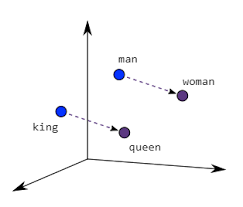
![word2vec](https://drive.google.com/uc?id=1lpFJylhiveWa7j6sXwoSkA0MSBDK485K)

In practice, this means that if we take the vector for "king," subtract the vector for "man," and then add the vector for "woman," we end up with a vector that is close to the vector for "queen." Mathematically, this relationship can be represented as:

$$ \textbf{vector}('king') - \textbf{vector}('man') + \textbf{vector}('woman') \approx \textbf{vector}('queen') $$

Let's use the `20 Newsgroups` dataset, which is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

- https://chatgpt.com/share/6978901e-a9b0-8000-9673-fa853c458b2c
- https://radimrehurek.com/gensim/models/word2vec.html
- https://www.geeksforgeeks.org/nlp/word2vec-with-gensim/

In [3]:
# Fetch the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [4]:
# Preprocess the text using gensim's simple_preprocess
# This will tokenize the text, lowercasing, and remove punctuation
corpus = [simple_preprocess(doc) for doc in newsgroups_train.data]

In [5]:
# Train the Word2Vec model
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, workers=4)

In [6]:
# Explore the model
# Let's find the most similar words to 'computer'
similar_words = model.wv.most_similar('computer', topn=10)
print("Most similar words to 'computer':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Most similar words to 'computer':
network: 0.7467
computers: 0.7305
workstation: 0.7176
systems: 0.7038
engineering: 0.6926
architecture: 0.6884
vendor: 0.6884
electronics: 0.6879
tech: 0.6862
software: 0.6832


In [7]:
similar_words = model.wv.most_similar('car', topn=10)
print("Most similar words to 'car':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Most similar words to 'car':
bike: 0.8318
tires: 0.7579
battery: 0.7084
engine: 0.6864
helmet: 0.6775
dealer: 0.6771
seat: 0.6732
driving: 0.6719
oil: 0.6678
riding: 0.6670


# Advanced Embeddings

## GloVe

GloVe is an unsupervised learning algorithm for obtaining vector representations of words. It stands for "Global Vectors for Word Representation," and it is specifically designed to capture global word-word co-occurrence statistics from a corpus. The resulting representations showcase interesting linear substructures of the word vector space.

### How GloVe Works

The GloVe model is trained on the non-zero elements in a word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus. Instead of using window-based co-occurrence, GloVe constructs an explicit word-context or word-word co-occurrence matrix using statistics across the whole text corpus.

The model then uses matrix factorization techniques to yield a word vector space, where the difference between any two word vectors aims to approximate the logarithm of the words' probability of co-occurrence.

Given a co-occurrence matrix $X$, where $X_{ij}$ denotes the number of times word $j$ occurs in the context of word $i$, the GloVe model aims to learn a vector $w_i$ for each word $i$ such that the dot product $w_i^T w_j$ is proportional to the logarithm of $X_{ij}$.

The training objective of GloVe is:

$$ J = \sum_{i,j=1}^V f(X_{ij}) (w_i^T w_j + b_i + b_j - \log X_{ij})^2 $$

where $V$ is the size of the vocabulary, $b_i$ and $b_j$ are scalar bias terms for words $i$ and $j$, and $f$ is a weighting function that helps prevent learning from large co-occurrence counts.

## FastText

FastText is another word embedding method that extends Word2Vec to consider subword information. This means that it takes into account the internal structure of words while learning word representations. FastText is particularly useful for languages with rich morphology and for understanding words outside the training vocabulary.

### How FastText Works

FastText represents each word as a bag of character n-grams, in addition to the word itself. This means that the word "apple" with $n=3$ would be represented as the following n-grams: "<ap", "app", "ppl", "ple", "le>" (where "<" and ">" are added to denote the beginning and end of the word, respectively).

The model then learns vector representations for these character n-grams, and the word vector is computed as the sum of the n-gram vectors. This allows FastText to produce representations for words not seen during training by summing the vectors of its component n-grams.

In [8]:
from gensim.models.fasttext import FastText

- https://radimrehurek.com/gensim/models/fasttext.html

In [9]:
# Train the FastText model
# The `vector_size` parameter specifies the dimensionality of the word vectors,
# `window` specifies the maximum distance between the current and predicted word within a sentence
# `min_count` specifies the minimum count of words to consider
# `workers` specifies the number of worker threads to train the model.
ft_model = FastText(vector_size=100, window=5, min_count=5, workers=4)
ft_model.build_vocab(corpus_iterable=corpus)
ft_model.train(corpus_iterable=corpus, total_examples=len(corpus), epochs=5)

(12578269, 16476320)

In [10]:
# Let's find the most similar words to 'computer'
similar_words = ft_model.wv.most_similar('computer', topn=10)
print("Most similar words to 'computer':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Most similar words to 'computer':
microcomputer: 0.9618
supercomputer: 0.9499
compute: 0.9277
computrac: 0.8933
computers: 0.8792
compusa: 0.8732
compulink: 0.8569
computes: 0.8530
compulsion: 0.8517
compuadd: 0.8514


# Text Classification with Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features. They are among the most straightforward and effective algorithms used in machine learning and natural language processing (NLP) for text classification tasks, such as spam filtering and sentiment analysis.

## Understanding Naive Bayes

Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For a class variable \(y\) and a dependent feature vector \(x_1\) through \(x_n\), Bayes' theorem states the following relationship:

$$ P(y \mid x_1, \ldots, x_n) = \frac{P(y) P(x_1, \ldots, x_n \mid y)}{P(x_1, \ldots, x_n)} $$

In the Naive Bayes classification, we are interested in finding the class with the highest probability, given the features. The "naive" assumption of conditional independence between every pair of features given the value of the class variable simplifies the computation, as follows:

$$ P(y \mid x_1, \ldots, x_n) \propto P(y) \prod_{i=1}^n P(x_i \mid y) $$

Since we are only interested in the class with the maximum probability, we can ignore the denominator and use the following classification rule:

$$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^n P(x_i \mid y) $$

## Naive Bayes in NLP

In NLP, Naive Bayes classifiers are commonly applied to text classification problems. When dealing with text, the features are usually the frequency or presence of words. For example, in a spam filtering application, the features might be the presence or frequency of specific words or sequences of words in an email.

### Multinomial Naive Bayes

The Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which is widely used for document classification problems. It accounts for the number of occurrences of each word (term frequency) for classification.

### Bernoulli Naive Bayes

The Bernoulli Naive Bayes classifier is suitable when your feature vectors are binary (i.e., 0s and 1s). An example might be text classification with a 'bag of words' model where the 1s & 0s represent the presence or absence of a word in the document.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [12]:
# Fetch the dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

In [13]:
# Create a pipeline that vectorizes the data then applies Multinomial Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [14]:
# Train the model
model.fit(newsgroups_train.data, newsgroups_train.target)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [15]:
# Predict the categories of the test data
predicted_categories = model.predict(newsgroups_test.data)

In [16]:
# Evaluate the model
print(classification_report(newsgroups_test.target, predicted_categories, target_names=newsgroups_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.90      0.91       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

              accuracy                           0.93      1502
             macro avg       0.93      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502



In [17]:
predicted_category_names = [newsgroups_train.target_names[i] for i in predicted_categories]

# View the first 10 predictions
print(predicted_category_names[:10])


['sci.med', 'sci.med', 'sci.med', 'alt.atheism', 'soc.religion.christian', 'alt.atheism', 'comp.graphics', 'soc.religion.christian', 'sci.med', 'sci.med']


In [18]:
for text, true_label, pred_label in zip(newsgroups_test.data[:10],
                                        newsgroups_test.target[:10],
                                        predicted_categories[:10]):
    print("Text snippet:", text[:100].replace('\n', ' '))
    print("Actual:", newsgroups_test.target_names[true_label])
    print("Predicted:", newsgroups_test.target_names[pred_label])
    print('-'*80)


Text snippet: From: brian@ucsd.edu (Brian Kantor) Subject: Re: HELP for Kidney Stones .............. Organization:
Actual: sci.med
Predicted: sci.med
--------------------------------------------------------------------------------
Text snippet: From: rind@enterprise.bih.harvard.edu (David Rind) Subject: Re: Candida(yeast) Bloom, Fact or Fictio
Actual: sci.med
Predicted: sci.med
--------------------------------------------------------------------------------
Text snippet: From: adwright@iastate.edu () Subject: Re: centi- and milli- pedes Organization: Iowa State Universi
Actual: sci.med
Predicted: sci.med
--------------------------------------------------------------------------------
Text snippet: From: livesey@solntze.wpd.sgi.com (Jon Livesey) Subject: Re: free moral agency Organization: sgi Lin
Actual: alt.atheism
Predicted: alt.atheism
--------------------------------------------------------------------------------
Text snippet: From: jhpb@sarto.budd-lake.nj.us (Joseph H. Buehler) S

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [20]:
cm = confusion_matrix(newsgroups_test.target, predicted_categories)


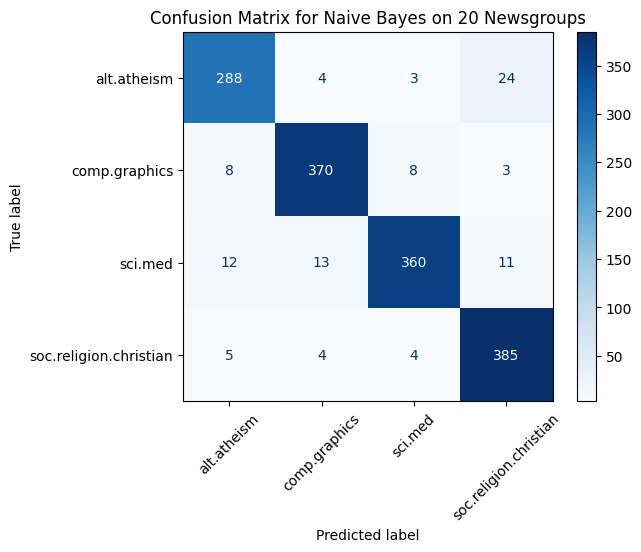

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=newsgroups_train.target_names)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Naive Bayes on 20 Newsgroups")
plt.show()


https://chatgpt.com/share/6978901e-a9b0-8000-9673-fa853c458b2c